**Environment Setup**

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
# Load datasets
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')


In [6]:
# Add labels and combine
true_news['label'] = 0  # 0 for real news
fake_news['label'] = 1  # 1 for fake news


In [7]:
# Combine datasets and shuffle
df = pd.concat([true_news, fake_news]).sample(frac=1).reset_index(drop=True)


In [8]:
# Combine title and text
df['full_text'] = df['title'] + ' ' + df['text']

In [9]:
# Text preprocessing function
def preprocess_text(text):
    # Handle NaN values
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [10]:
# Apply preprocessing
df['cleaned_text'] = df['full_text'].apply(preprocess_text)

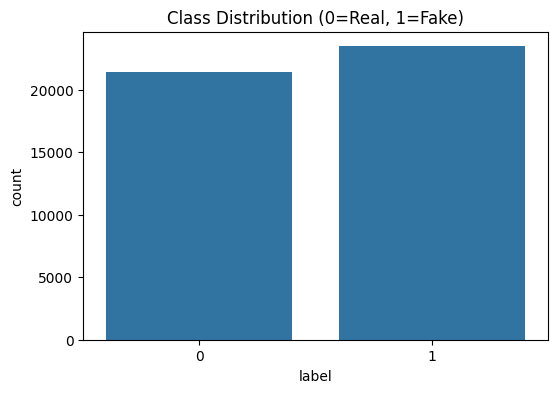

In [11]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution (0=Real, 1=Fake)')
plt.show()

In [12]:
# TF-IDF Vectorization with n-grams
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [15]:
# Evaluation
y_pred = nb_classifier.predict(X_test)

print("Model Evaluation:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.95

Confusion Matrix:
[[4058  203]
 [ 248 4471]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4261
           1       0.96      0.95      0.95      4719

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



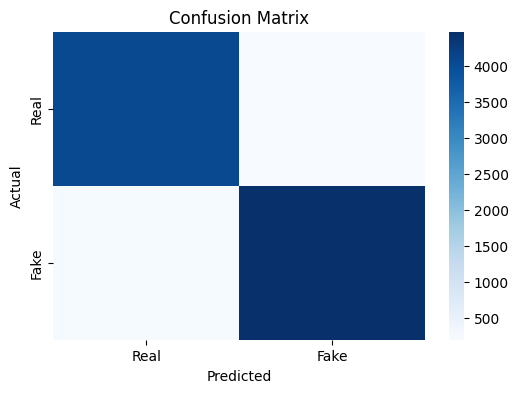

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
# Prediction function
def predict_news(text):
    cleaned = preprocess_text(text)
    features = tfidf.transform([cleaned])
    pred = nb_classifier.predict(features)
    return "Fake News" if pred[0] == 1 else "Real News"

In [18]:
# Test with sample headlines
sample_news = [
    "Scientists confirm chocolate prevents cancer",  # Likely fake
    "Congress passes new budget bill unanimously",  # Likely real
    "Aliens establish embassy in Washington",       # Definitely fake
    "Federal Reserve raises interest rates by 0.25%" # Likely real
]

print("\nSample Predictions:")
print("="*50)
for news in sample_news:
    print(f"\"{news}\" → {predict_news(news)}")


Sample Predictions:
"Scientists confirm chocolate prevents cancer" → Fake News
"Congress passes new budget bill unanimously" → Real News
"Aliens establish embassy in Washington" → Fake News
"Federal Reserve raises interest rates by 0.25%" → Real News
